In [1]:
import pandas as pd
import os

import numpy as np

import matplotlib.pyplot as plt

In [2]:

ecb_with_sentiment = pd.read_csv('./ecb_with_sentiment_vader.csv')
ecb_with_sentiment.head()

ecb_with_sentiment=ecb_with_sentiment.drop(columns=["contents"])
# ecb_with_sentiment = ecb_with_sentiment.loc[ecb_with_sentiment.subtitle.str.contains("\sMember\s"),:]

In [3]:
ecb_with_sentiment.to_csv('./ecb_sentiment_only_vader.csv')

In [4]:
ecb_with_sentiment.head()

,Unnamed: 0,date,speakers,title,subtitle,mean,std,pos_mean,pos_std,neu_mean,neu_std,neg_mean,neg_std,pos_np,neu_np,neg_np
0,0,2021-05-27,Isabel Schnabel,Societal responsibility and central bank indep...,"Keynote speech by Isabel Schnabel, Member of t...",0.007858,0.422938,0.066437,0.098586,0.877139,0.137170,0.056417,0.093079,[0. 0.076 0.154 0.278 0.213 0.278 0. 0.1...,[1. 0.778 0.846 0.722 0.787 0.722 1. 0.7...,[0. 0.146 0. 0. 0. 0. 0. 0.1...
1,1,2021-05-27,Luis de Guindos,Climate change and financial integration,"Keynote speech by Luis de Guindos, Vice-Presid...",0.057453,0.477776,0.101753,0.109795,0.822914,0.150518,0.075355,0.128274,[0. 0.119 0. 0.147 0.278 0.064 0.179 0. ...,[1. 0.441 0.565 0.706 0.722 0.936 0.643 1. ...,[0. 0.441 0.435 0.147 0. 0. 0.179 0. ...
2,3,2021-05-19,Fabio Panetta,At the edge of tomorrow: preparing the future ...,"Introductory remarks by Fabio Panetta, Member ...",0.154442,0.243678,0.056356,0.078378,0.936800,0.078100,0.006844,0.026981,[0.07 0.107 0.146 0.174 0. 0.14 0. 0. ...,[0.93 0.893 0.854 0.826 1. 0.86 0.851 1. ...,[0. 0. 0. 0. 0. 0. 0.149 0. ...
3,4,2021-05-06,Christine Lagarde,Towards a green capital markets union for Europe,"Speech by Christine Lagarde, President of the ...",0.198494,0.402119,0.102151,0.115273,0.861753,0.138207,0.036129,0.074386,[0.115 0. 0. 0.113 0.078 0. 0. 0. ...,[0.885 1. 1. 0.887 0.922 1. 1. 1. ...,[0. 0. 0. 0. 0. 0. 0. 0. ...
4,6,2021-04-29,Frank Elderson,All the way to zero: guiding banks towards a c...,"Keynote speech by Frank Elderson, Vice-Chair o...",0.077899,0.394133,0.077323,0.101795,0.870567,0.121974,0.052142,0.073834,[0.044 0.144 0.495 0.152 0. 0. 0. 0.2...,[0.956 0.856 0.505 0.848 1. 1. 0.545 0.7...,[0. 0. 0. 0. 0. 0. 0.455 0. ...


In [5]:
threshold_neutral = 0.6
threshold_significance = 0.05

threshold_mean_significance = 0.05

def remove_neutral(pos, neu, neg):
    pos = np.fromstring(pos[1:-1],sep=' ')
    neu = np.fromstring(neu[1:-1],sep=' ')
    neg = np.fromstring(neg[1:-1],sep=' ')
    combined = np.array([pos,neu,neg]).T #(num_of_sent,3)
    filtered = combined[neu<threshold_neutral]
    res = (filtered.T[0]-filtered.T[2]) 
    res = res[np.abs(res)>threshold_significance]
    return res


ecb_with_sentiment['filtered'] = ecb_with_sentiment.apply(lambda row: remove_neutral(row['pos_np'],row['neu_np'],row['neg_np']),axis=1)

ecb_with_sentiment['filtered_mean'] = ecb_with_sentiment.apply(lambda row: row['filtered'].mean(),axis=1)

ecb_with_sentiment['filtered_std'] = ecb_with_sentiment.apply(lambda row: row['filtered'].std(),axis=1)


old = len(ecb_with_sentiment)
ecb_with_sentiment_new = ecb_with_sentiment[ecb_with_sentiment.filtered_mean > threshold_mean_significance]
new = len(ecb_with_sentiment_new)
print(old-new)

/var/folders/j9/rqqkqhds231b5h_6lrr4xt6h0000gn/T/ipykernel_29566/332906606.py:19: RuntimeWarning: Mean of empty slice.
  ecb_with_sentiment['filtered_mean'] = ecb_with_sentiment.apply(lambda row: row['filtered'].mean(),axis=1)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/core/_methods.py:254: RuntimeWarnin

In [7]:
# for each time interval (quarterly)
#    check speech overal sentiment
#    plot graph
 
# quarters = ["({0})".format(i) for i in range(1,13)]
quarters = ["(1|2|3)","(4|5|6)", "(7|8|9)","(10|11|12)"]
# quarters = ["(1|2|3|4|5|6|7|8|9|10|11|12)"]
# quarters = ["(1|2|3|4|5|6)","(7|8|9|10|11|12)"]

col = ["year","quarter","mean","std",] # "fss_mean", "fss_std", "pos_mean", "pos_std", "neg_mean","neg_std"])

quarterly_data = pd.DataFrame(columns = col) 


for year in range(1997,2022):
    for index, quarter in enumerate(quarters):
        data = ecb_with_sentiment_new.loc[ecb_with_sentiment['date'].str.contains(str(year) + '-0?' + quarter + '-'), :]
        # assume sample mean (neglect difference in datapoints)
        temp_data = pd.DataFrame([[year, index + 1, data['filtered_mean'].mean(), data['filtered_mean'].std()]],columns = col)
    
        quarterly_data = quarterly_data.append(temp_data, ignore_index = True)

quarterly_data.to_csv('./ecb_sentiment_quarterly_vader.csv')




/var/folders/j9/rqqkqhds231b5h_6lrr4xt6h0000gn/T/ipykernel_29566/3649685093.py:17: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  data = ecb_with_sentiment_new.loc[ecb_with_sentiment['date'].str.contains(str(year) + '-0?' + quarter + '-'), :]


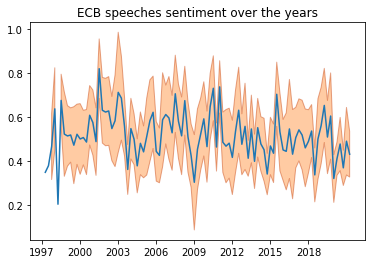

In [8]:
year = [[ year + index/4 for index in range (0, 4) ]for year in range(1997,2022)]
year = [item for sublist in year for item in sublist]
# year = [ year for year in range(1997,2022)]
mean = quarterly_data['mean'].to_numpy()
std = quarterly_data['std'].to_numpy()
# fss_mean = quarterly_data['fss_mean'].to_numpy()
# fss_std = quarterly_data['fss_std'].to_numpy()
# pos_mean = quarterly_data['pos_mean'].to_numpy()
# pos_std = quarterly_data['pos_std'].to_numpy()
# neg_mean = quarterly_data['neg_mean'].to_numpy()
# neg_std = quarterly_data['neg_std'].to_numpy()

fig = plt.figure()


# import scipy.signal as signal

# sos = signal.butter(536, 35, 'lp', fs=1000, output='sos')
# filtered = signal.sosfiltfilt(sos, mean)

x = year
y = mean *2
yerr = std
   
# plt.errorbar(x, y, yerr = yerr)
plt.plot(x,y)

plt.fill_between(x, y-yerr, y+yerr,
    alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848')
   
plt.xticks(np.arange(1997, 2021, 3))
plt.title('ECB speeches sentiment over the years')
plt.show()